# Name : M.Pradeep Adithyan


In [46]:
import pandas as pd

In [47]:
data= pd.read_csv("root2ai - Data.csv")

In [48]:
data.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [49]:
data['Target'].value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        977
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

From this we can  clearly see that class FinTech has the max no of observations.


In [50]:
data.shape

(22704, 2)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22704 entries, 0 to 22703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    22701 non-null  object
 1   Target  22704 non-null  object
dtypes: object(2)
memory usage: 354.9+ KB


In [52]:
data['Text']=data['Text'].astype(str)

In [53]:
data=data.drop_duplicates("Text")
data.shape

(20987, 2)

In [54]:
from nltk.corpus import stopwords
import re

Data Cleaning :

In [55]:
data = data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text)
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
data['Text'] = data['Text'].apply(clean_text)

In [56]:
import keras
from keras.layers import Dense,Embedding
from keras.models import Sequential
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import SpatialDropout1D

In [57]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [58]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 11344 unique tokens.


In [59]:
X = tokenizer.texts_to_sequences(data['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (20987, 250)


In [60]:
Y = pd.get_dummies(data['Target']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (20987, 11)


We are encoding the class names and place them in an array

In [61]:
from sklearn.model_selection import train_test_split

Here we are spiltiitng the data for training and testing with 25% 

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(15740, 250) (15740, 11)
(5247, 250) (5247, 11)


In [63]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=Y.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(11, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 11, 100)           5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 11, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 11)                1111      
Total params: 5,081,511
Trainable params: 5,081,511
Non-trainable params: 0
_________________________________________________________________


In [64]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
222/222 [==============================] - 103s 458ms/step - loss: 2.0213 - accuracy: 0.3976 - val_loss: 1.5091 - val_accuracy: 0.5362
Epoch 2/5
222/222 [==============================] - 108s 487ms/step - loss: 1.2846 - accuracy: 0.6012 - val_loss: 1.1870 - val_accuracy: 0.6252
Epoch 3/5
222/222 [==============================] - 142s 640ms/step - loss: 0.8911 - accuracy: 0.7210 - val_loss: 1.1527 - val_accuracy: 0.6328
Epoch 4/5
222/222 [==============================] - 154s 694ms/step - loss: 0.6777 - accuracy: 0.7816 - val_loss: 1.1821 - val_accuracy: 0.6442
Epoch 5/5
222/222 [==============================] - 156s 700ms/step - loss: 0.5112 - accuracy: 0.8394 - val_loss: 1.1901 - val_accuracy: 0.6315


In [65]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


164/164 [==============================] - 9s 56ms/step - loss: 1.2291 - accuracy: 0.6236
Test set
  Loss: 1.229
  Accuracy: 0.624


In [66]:
import matplotlib.pyplot as plt

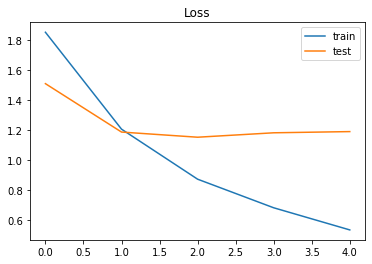

In [67]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

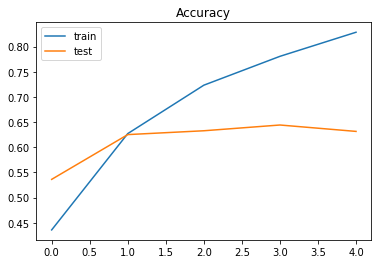

In [68]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

Finally we have archived an accuracy of 62%. From the graph we can see that increasing the no of epochs will not affect the result. The data is overfitting and this can be reduced by increasing the size of the data